# Solving a PDE: 
In this program we are going to solve a PDE using python, in this example we are dealing with a diffusion problem with constant diffusivity and fixed value boundary conditions such that:
$\partial \phi/\partial t = D \nabla^{2} \phi$

In [1]:
from fipy import *

In this part we are going to define our mesh using $\texttt{Grid1D}$ from $\texttt{fipy}$ package.

In [2]:
nx = 50
# Step size 
dx = 1./50.
# Defining the mesh 
mesh = Grid1D(nx=nx , dx=dx)

Now we are going to define the value of the $u(x,t)$ at $t=0$.

In [3]:
import numpy as np 
# making a mesh using linespace here
x = np.linspace(0.,1.,nx)
AA = np.sin(2.*np.pi*x) + 1./3. * np.sin(4.*np.pi*x) + 1./5. * np.sin(6.*np.pi*x)

FiPy solves all equations at the centers of the cells of the mesh. We thus need a CellVariable object to hold the values of the solution. 

In [4]:
phi = CellVariable(name = "solution variable",mesh=mesh,value=AA)

Now we are going to define the boundry conditions for the cell which in our case are $\phi(x) = 0$ at $x =0$ and $\phi(x) = 0$ at $x =1$:

In [5]:
valueLeft = 0.
valueRight = 0.

Next step would be to constrain $\phi(x)$ to the boundry conditions using $\texttt{.contrain}$ and 
$\texttt{mesh.facesRight}$ or $\texttt{mesh.facesLeft}$

In [6]:
phi.constrain(valueRight, mesh.facesRight)
phi.constrain(valueLeft, mesh.facesLeft)

In $\texttt{fipy}$ to solve the this PDE we can write:

In [7]:
D = 1.
eqX = TransientTerm() == ExplicitDiffusionTerm(coeff = D)

The largest stable timestep that can be taken for this explicit 1D diffusion problem is $\Delta t\le\Delta x^{2}/(2D)$. We take 90% of this duration here for a good measurment.

In [8]:
timeStepDuration = 0.9 * dx**2 / (2. * D)
steps = 1

In [9]:
x = mesh.cellCenters[0]
t = timeStepDuration * steps

Now we are going to solve the equation neumerically :

In [10]:
for step in range(steps):
    eqX.solve(var=phi, dt=timeStepDuration)

The analytical solution is:

In [11]:
analytical = (np.exp(-(2.*np.pi)**2*t)*np.sin(2.*np.pi*x)) + (1./3. *np.exp(-(4.*np.pi)**2*t)* np.sin(4.*np.pi*x)) + (1./5. *np.exp(-(6.*np.pi)**2*t)*np.sin(6.*np.pi*x))

Now we can plot and compare analytical and numerical solution.

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


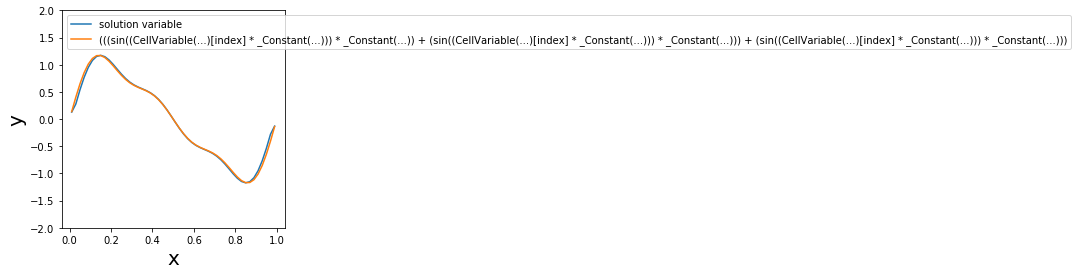

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

if __name__ == "__main__":
    viewer = Viewer(vars=(phi, analytical),
                datamin=-2., datamax=2.)
    viewer.plot()
    plt.legend(loc=1,fontsize = 14)
    plt.xlabel('x',fontsize = 20)
    plt.ylabel('y',fontsize = 20)


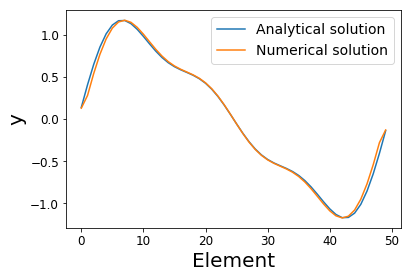

In [13]:


plt.plot(analytical,label = "Analytical solution")
plt.plot(phi,label = 'Numerical solution')
plt.legend(loc=1,fontsize = 14)
plt.xlabel('Element',fontsize = 20)
plt.ylabel('y',fontsize = 20)
plt.tick_params(axis='both', labelsize=12)
